## Simple Example for Running LLaVA with Huggingface
- from the server enable `llava` conda environment using
```
conda activate llava
```

- you can launch a Jupyter server to run this notebook or create a Python file and run it from a terminal.

In [1]:
from PIL import Image
import requests
from transformers import AutoProcessor, LlavaForConditionalGeneration

In [2]:
# LLaVa has two variants: one with 7B parameters and another with 13B parameters.
model = LlavaForConditionalGeneration.from_pretrained("llava-hf/llava-1.5-7b-hf") # Load pretrained model with 7B parameters
processor = AutoProcessor.from_pretrained("llava-hf/llava-1.5-7b-hf") # Load input (image and text) preprocessor for 7B parameters model

/data/anaconda/anaconda3/envs/llava/lib/python3.10/site-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


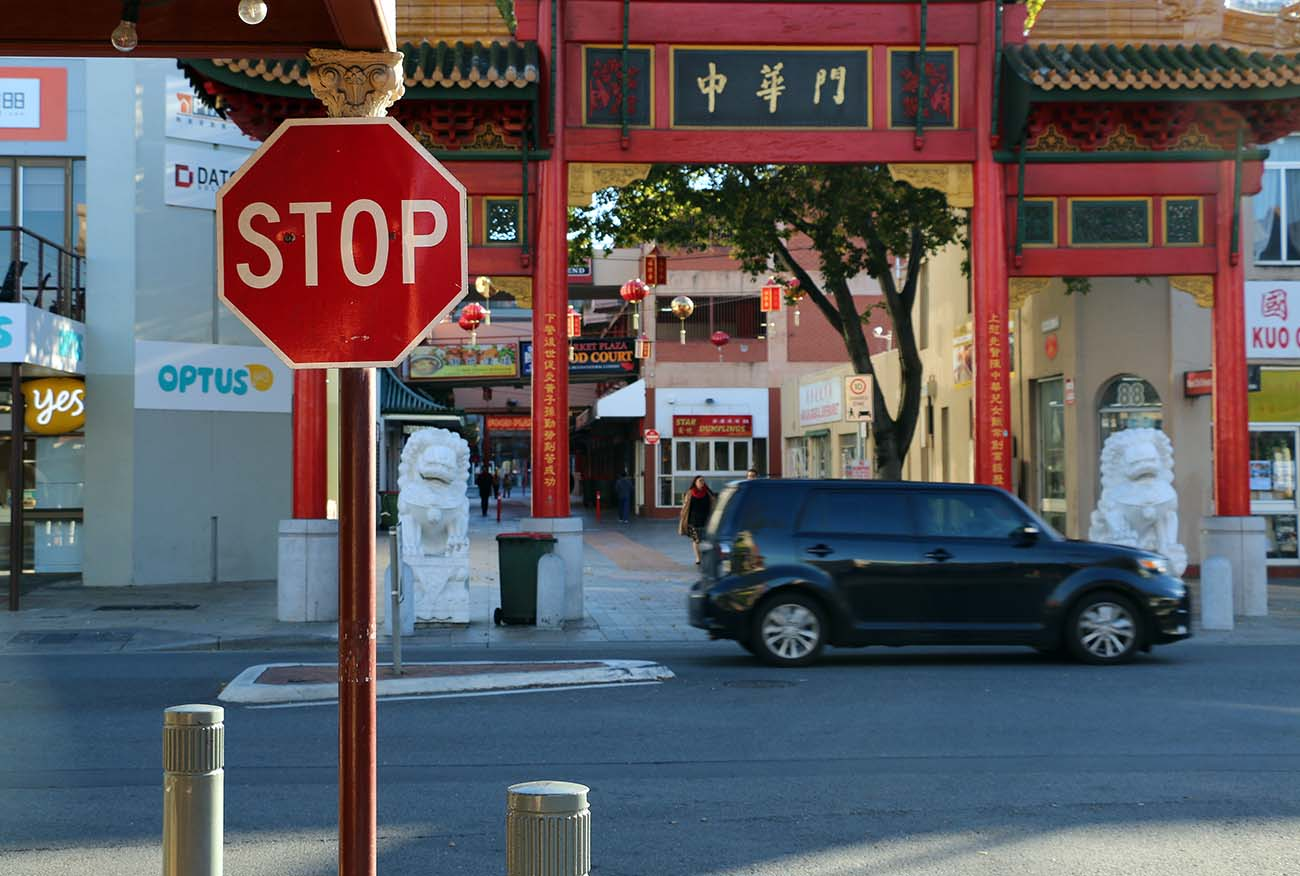

In [3]:
prompt = "USER: <image>\nWhat's the content of the image? ASSISTANT:" # Prompt
url = "https://www.ilankelman.org/stopsigns/australia.jpg"
image = Image.open(requests.get(url, stream=True).raw) # load image

image.show() # view image

In [4]:
inputs = processor(text=prompt, images=image, return_tensors="pt") # preprocess inputs

# Generate
generate_ids = model.generate(**inputs, max_new_tokens=15)
processor.batch_decode(generate_ids, skip_special_tokens=True, clean_up_tokenization_spaces=False)[0] # decode output to natural language text

"USER:  \nWhat's the content of the image? ASSISTANT: The image features a street scene with a stop sign, a red building,"

In [5]:
model = LlavaForConditionalGeneration.from_pretrained("llava-hf/llava-1.5-13b-hf") # Load pretrained model with 13B parameters
processor = AutoProcessor.from_pretrained("llava-hf/llava-1.5-13b-hf") # Load input (image and text) preprocessor for 13B parameters model

prompt = "USER: <image>\nWhat's the content of the image? ASSISTANT:" # Prompt
url = "https://www.ilankelman.org/stopsigns/australia.jpg"
image = Image.open(requests.get(url, stream=True).raw) # load image

inputs = processor(text=prompt, images=image, return_tensors="pt") # preprocess inputs

# Generate
generate_ids = model.generate(**inputs, max_new_tokens=15)
processor.batch_decode(generate_ids, skip_special_tokens=True, clean_up_tokenization_spaces=False)[0] # decode output to natural language text

Loading checkpoint shards:   0%|          | 0/6 [00:00<?, ?it/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


"USER:  \nWhat's the content of the image? ASSISTANT: The image features a stop sign located in front of a red archway,"